## Import and reconstruct the Iris dataset in Python

The following Python commands import and add the labels to the iris dataset.


In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import numpy as np

# 1. complete the iris dataset by adding species
iris = datasets.load_iris()
iris = pd.DataFrame(
    data= np.c_[iris['data'], iris['target']],
    columns= iris['feature_names'] + ['target']
    )

species = []

for i in range(len(iris['target'])):
    if iris['target'][i] == 0:
        species.append("setosa")
    elif iris['target'][i] == 1:
        species.append('versicolor')
    else:
        species.append('virginica')


iris['species'] = species
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,virginica
146,6.3,2.5,5.0,1.9,2.0,virginica
147,6.5,3.0,5.2,2.0,2.0,virginica
148,6.2,3.4,5.4,2.3,2.0,virginica


Then we can visualize the dataset using the library seaborn. This is a first step before trying some classification algorithms.

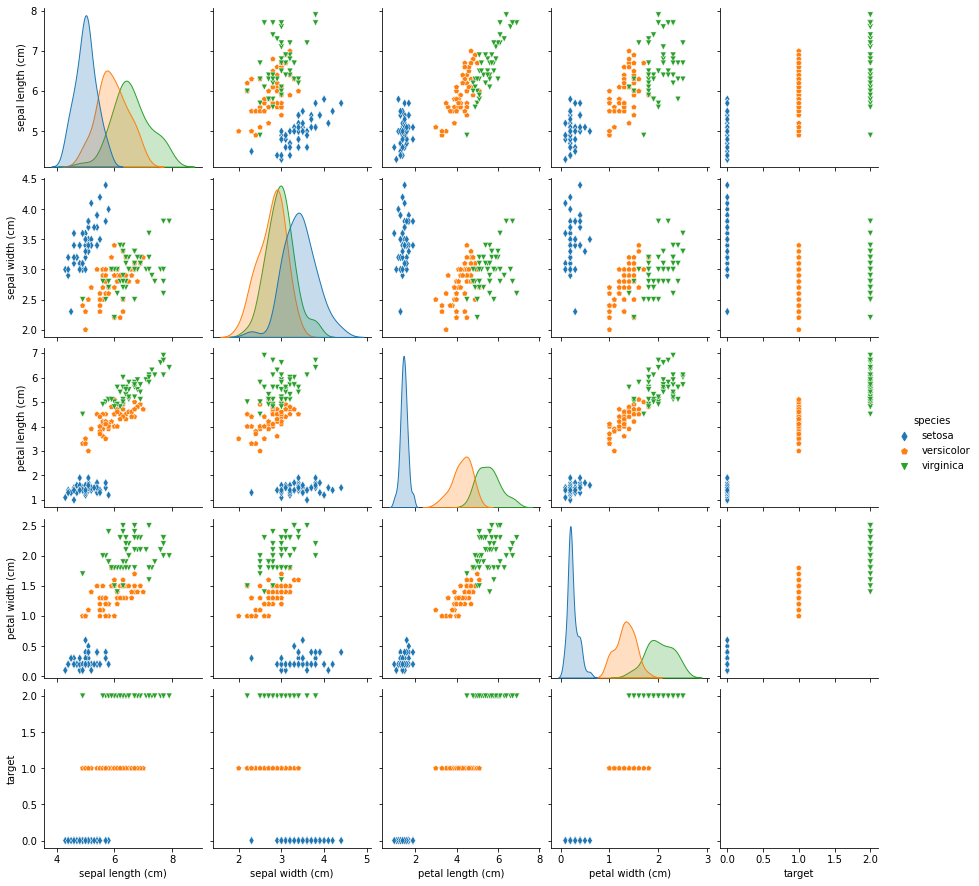

In [37]:
# 2. Visualization using seaborn
sns.pairplot(iris, hue="species", markers = ['d', 'p', 'v'])
plt.show()


We will try some classification algorithms and plot the confusion matrix for each algorithm. Let us start with Naïve Bayes classifier.
Before we do that, we need to import some libraries and split the initial iris dataset into a training and a testing dataset.

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Seperating the data into dependent and independent variables
X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      1.00      1.00        18
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
accuracy is 1.0


Then we can plot the confusion matrix.